In [ ]:
from rswarp.utilities.file_utils import loadparticlefiles
from rswarp.utilities.beam_analysis import convertunits

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
from opmd_viewer import OpenPMDTimeSeries


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
figure = {'figsize' : (8,6),
          'facecolor' : 'white'}

matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)

matplotlib.rcParams['image.cmap'] = 'viridis'

In [9]:
def plotField((F,info), fig=None,  
              xlim=None, ylim=None, 
              xlab="Z (m)", ylab="x (m)", title="E (V/m)",
              vmin=None, vmax=None,
              cmap='viridis'
             ):
    """ 
    Plot the given field
    (F,info) - tuple returned by ts.get_field()
    lim - symmetric limit
    xlab, ylab, title - plot labels
    """
    
    r = info.r
    z = info.z
    extent = lambda a: [a.min(), a.max()]
    
    if not xlim:
        xlim = extent(info.z)
    if not ylim:
        ylim = extent(info.r)
        
    if not fig:
        fig = plt.figure()
    
    Z,R = np.meshgrid(z,r)
    plt.pcolormesh(Z, R, F, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title, y=1.02)
    return fig

def plotFieldsAtIteration(ts, field, fieldunit='', vmin=-2, vmax=2, iteration=-1, returnfig=False, **kwargs):
    (Er,info) = ts.get_field(field=field, coord='r', iteration=ts.iterations[iteration])
    (Ez,info) = ts.get_field(field=field, coord='z', iteration=ts.iterations[iteration])

    fig = plt.figure(figsize=(8,6))

    f_Er = plotField((Er,info), fig=fig, title="$%s_R %s$ at t=%.2E s" % (field, fieldunit, ts.t[iteration]), vmin=vmin, vmax=vmax, **kwargs)

    fig.tight_layout()
    if returnfig:
        return fig
    

In [8]:
# Import phase space data from all steps.
stepArrays = loadparticlefiles('diags.with/xySlice/hdf5/')
steps = stepArrays.keys()
steps.sort()

eleccount = [stepArrays[s]['e-'].shape[0] for s in steps]
emiteleccount = [stepArrays[s]['emitted e-'].shape[0] for s in steps]
h2pcount = [stepArrays[s]['H2+'].shape[0] for s in steps]
t = np.array([stepArrays[s]['time'] for s in steps])

filteredsteps = steps[-2:-1]
elecdata = [convertunits(stepArrays[s]['e-']) for s in filteredsteps]
emitelecdata = [convertunits(stepArrays[s]['emitted e-']) for s in filteredsteps]
h2pdata = [convertunits(stepArrays[s]['H2+']) for s in filteredsteps]
times = [stepArrays[s]['time'] for s in filteredsteps]
print("Length of data: %i steps, from %.2E to %.2E s" % (len(times),times[0],times[-1]))

OSError: [Errno 2] No such file or directory: 'diags.with/xySlice/hdf5/'

/home/vagrant/.pyenv/versions/2.7.10/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


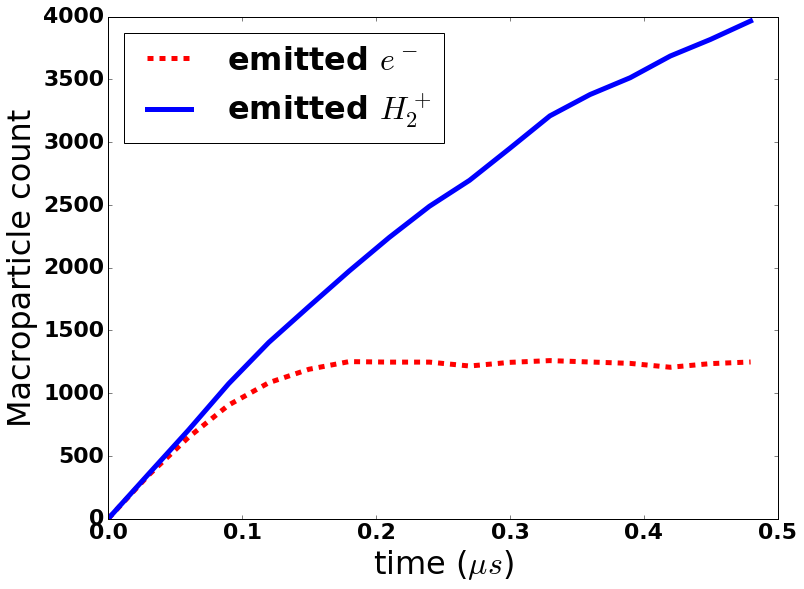

In [4]:
fig = plt.figure(figsize=(12,9))
plt.plot(t * 1e6,emiteleccount,'r--', lw=5, label='emitted $e^-$')
plt.plot(t * 1e6,h2pcount,'b-', lw=5, label='emitted $H_2^+$')
plt.xlabel('time ($\mu s$)', fontsize=32)
plt.ylabel('Macroparticle count', fontsize=32)
plt.legend(loc='upper left', fontsize=32)
plt.show()
# fig.savefig('population.png')

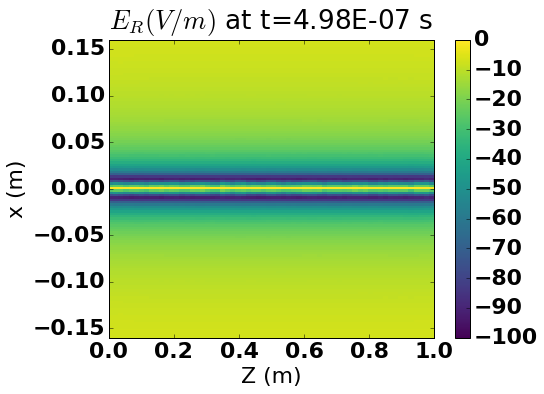

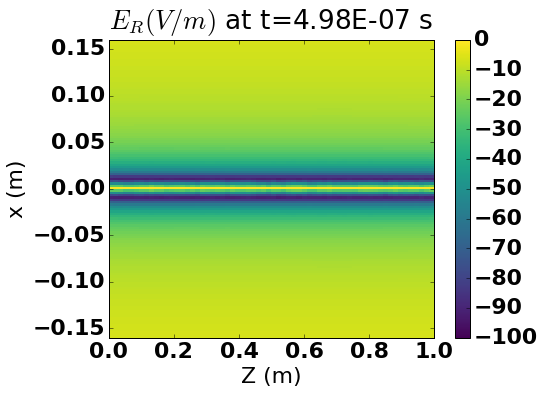

In [11]:
Ets_without = OpenPMDTimeSeries('diags.without/fields/electric/')
Ets_with = OpenPMDTimeSeries('/diags.with/fields/electric/')

f = plotFieldsAtIteration(Ets_with, 'E', '(V/m)', iteration=-1, vmax=0, vmin=-100, returnfig=True)
# f.savefig("field_with.png")

f = plotFieldsAtIteration(Ets_without, 'E', '(V/m)', iteration=-1, vmax=0, vmin=-100, returnfig=True)
# f.savefig("field_without.png")

/home/vagrant/.pyenv/versions/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide
/home/vagrant/.pyenv/versions/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


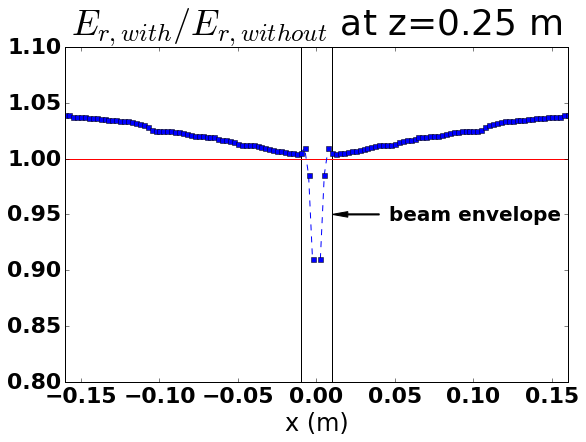

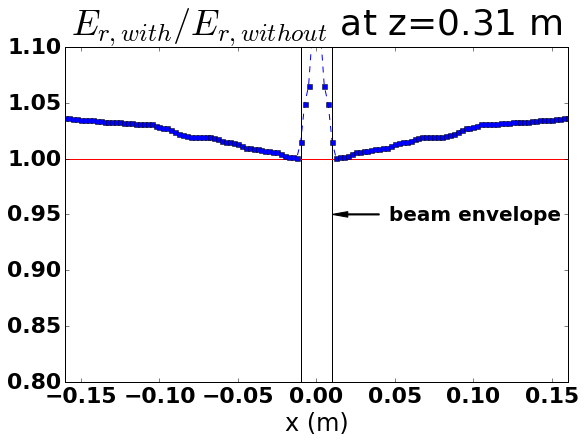

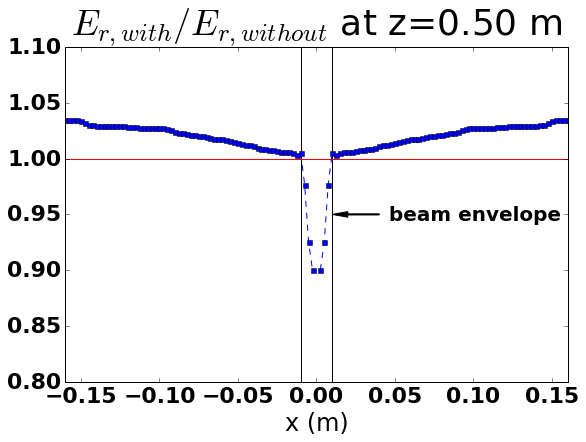

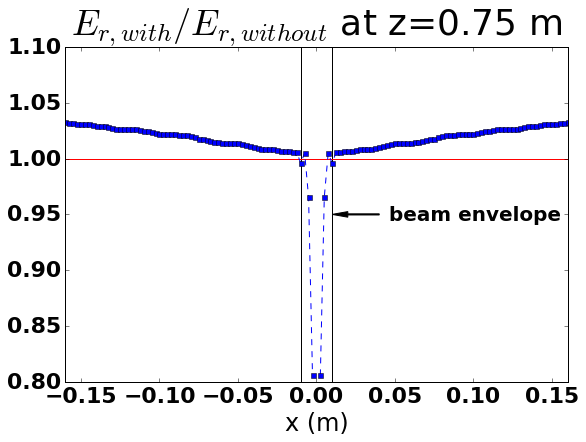

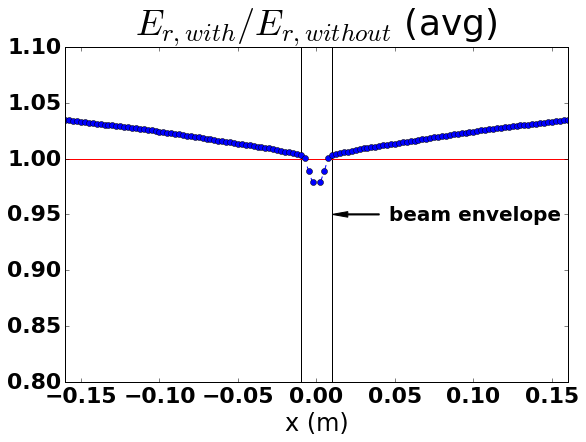

In [13]:
figure = {'figsize' : (9,6),
          'facecolor' : 'white'}

matplotlib.rc('figure', **figure)

ts_with = Ets_with
ts_without = Ets_without
coord = 'r'

(F_with,info_with) = ts_with.get_field(field="E", coord=coord, iteration=ts_with.iterations[-1])
(F_without,info_without) = ts_without.get_field(field="E", coord=coord, iteration=ts_without.iterations[-1])

ndz = 32
z = info_with.zmin + ndz * info_with.dz

for ndz in [16, 20, 32, 48]:
    f = plt.figure()
    
    plt.title("$E_{%s,with} / E_{%s,without}$ at z=%.2f m" % (coord, coord, ndz * info_with.dz), fontsize=36, y=1.02)
    ax = plt.plot(info_without.r, F_with[:, ndz] / F_without[:, ndz], 'bs--', markersize=5)
    plt.xlabel("x (m)", fontsize=24)
    plt.ylim([0.8, 1.1])
    plt.xlim([info_without.rmin, info_without.rmax])
    plt.vlines([elecdata[0][:,0].min(),elecdata[0][:,0].max()], ymin=plt.ylim()[0], ymax=plt.ylim()[1])
    plt.hlines(1.0, info_without.rmin, info_without.rmax, 'r')
    plt.arrow(x=0.04, y=0.95, dx=-0.02, dy=0, color='k', head_width=0.005, head_length=0.01)
    plt.text(x=0.046, y=0.945, s="beam envelope", fontsize=20)
#     f.savefig("field_ratio_%.2fm.png" % (ndz*info_with.dz))

f = plt.figure()
plt.title("$E_{%s,with} / E_{%s,without}$ (avg)" % (coord, coord), fontsize=36, y=1.02)
plt.xlabel("x (m)", fontsize=24)
plt.plot(info_without.r, F_with.mean(axis=1) / F_without.mean(axis=1), 'b--o')
plt.ylim([0.8, 1.1])
plt.xlim([info_without.rmin, info_without.rmax])
plt.vlines([elecdata[0][:,0].min(),elecdata[0][:,0].max()], ymin=plt.ylim()[0], ymax=plt.ylim()[1])
plt.hlines(1.0, info_without.rmin, info_without.rmax, 'r')
plt.arrow(x=0.04, y=0.95, dx=-0.02, dy=0, color='k', head_width=0.005, head_length=0.01)
plt.text(x=0.046, y=0.945, s="beam envelope", fontsize=20)
# f.savefig("field_ratio_avg.png")

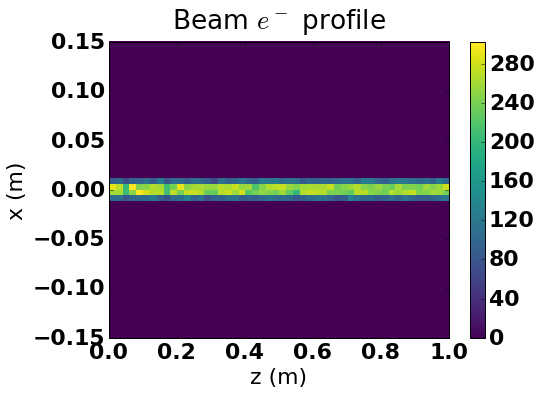

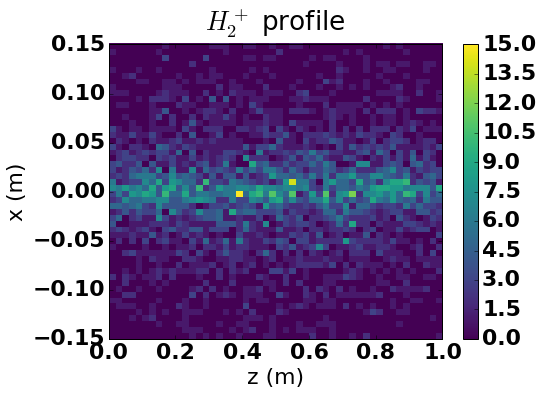

In [14]:
plt.figure(figsize=(8,6))
s = elecdata[0]
x = s[:, 0]
xp = s[:, 1]
y = s[:, 2]
yp = s[:, 3]
z = s[:, 4]
pz = s[:, 5]

cts, xedges, yedges, im = plt.hist2d(z, x, range=[[0, 1.0], [-0.15, 0.15]], bins=50)
cbar = plt.colorbar()
plt.xlim([0, 1.0])
plt.xlabel('z (m)')

plt.ylim([-0.15, 0.15])
plt.ylabel('x (m)')
plt.title('Beam $e^-$ profile', y=1.03)
plt.tight_layout()
# plt.savefig('ebeam_xsection.png')

plt.figure(figsize=(8,6))
s = h2pdata[0]
x = s[:, 0]
xp = s[:, 1]
y = s[:, 2]
yp = s[:, 3]
z = s[:, 4]
pz = s[:, 5]

cts, xedges, yedges, im = plt.hist2d(z, x, range=[[0, 1.0], [-0.15, 0.15]], bins=50)
cbar = plt.colorbar()
plt.xlim([0, 1.0])
plt.xlabel('z (m)')

plt.ylim([-0.15, 0.15])
plt.ylabel('x (m)')
plt.title('$H_2^+$ profile', y=1.03)
plt.tight_layout()
# plt.savefig('h2plus_xsection.png')